# **Supervised Machine Learning**
[ Regression, Loss functions, Overfitting ]

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('HousePrices.csv')
df.head(5)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   Zone_Class           1460 non-null   object 
 3   LotFrontage          1201 non-null   float64
 4   LotArea              1460 non-null   int64  
 5   Road_Type            1460 non-null   object 
 6   Alley                91 non-null     object 
 7   Property_Shape       1460 non-null   object 
 8   LandContour          1460 non-null   object 
 9   Utilities            1460 non-null   object 
 10  LotConfig            1460 non-null   object 
 11  LandSlope            1460 non-null   object 
 12  Neighborhood         1460 non-null   object 
 13  Condition1           1460 non-null   object 
 14  Condition2           1460 non-null   object 
 15  Dwelling_Type        1460 non-null   o

In [ ]:
# Shape of dataset: rows: 1460 and cols: 81

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]   #cols having missing values > 0

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
#Cols to remove with huge missing values:
cols_to_remove = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage', 'Id']

df = df.drop(columns=cols_to_remove)

In [ ]:
df.head(5)

,Id,Dwell_Type,Zone_Class,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   Zone_Class           1460 non-null   object 
 3   LotArea              1460 non-null   int64  
 4   Road_Type            1460 non-null   object 
 5   Property_Shape       1460 non-null   object 
 6   LandContour          1460 non-null   object 
 7   Utilities            1460 non-null   object 
 8   LotConfig            1460 non-null   object 
 9   LandSlope            1460 non-null   object 
 10  Neighborhood         1460 non-null   object 
 11  Condition1           1460 non-null   object 
 12  Condition2           1460 non-null   object 
 13  Dwelling_Type        1460 non-null   object 
 14  HouseStyle           1460 non-null   object 
 15  OverallQual          1460 non-null   i

In [ ]:
# Numeric columns - fill NaNs with mean
numeric_cols = ['MasVnrArea', 'GarageYrBlt']

for col in numeric_cols:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

# Categorical columns - fill NaNs with mode
categorical_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

In [ ]:
# Missing values resolved!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   Zone_Class           1460 non-null   object 
 3   LotArea              1460 non-null   int64  
 4   Road_Type            1460 non-null   object 
 5   Property_Shape       1460 non-null   object 
 6   LandContour          1460 non-null   object 
 7   Utilities            1460 non-null   object 
 8   LotConfig            1460 non-null   object 
 9   LandSlope            1460 non-null   object 
 10  Neighborhood         1460 non-null   object 
 11  Condition1           1460 non-null   object 
 12  Condition2           1460 non-null   object 
 13  Dwelling_Type        1460 non-null   object 
 14  HouseStyle           1460 non-null   object 
 15  OverallQual          1460 non-null   i

In [ ]:
df.describe()

,Id,Dwell_Type,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Unique values for categorical cols
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()[:10]}")  # show first 10 unique values

Zone_Class: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Road_Type: ['Pave' 'Grvl']
Property_Shape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Dwelling_Type: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Ply

In [ ]:
# Property_Sale_Price is very likely the target variable
# Non-numeric columns are excluded automatically.
# Correlation is only calculated between numeric columns.

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()['Property_Sale_Price'].sort_values(ascending=False)
print(corr)

Property_Sale_Price    1.000000
OverallQual            0.790982
GrLivArea              0.708624
GarageCars             0.640409
GarageArea             0.623431
TotalBsmtSF            0.613581
1stFlrSF               0.605852
FullBath               0.560664
TotRmsAbvGrd           0.533723
YearBuilt              0.522897
YearRemodAdd           0.507101
MasVnrArea             0.475241
GarageYrBlt            0.470177
Fireplaces             0.466929
BsmtFinSF1             0.386420
WoodDeckSF             0.324413
2ndFlrSF               0.319334
OpenPorchSF            0.315856
HalfBath               0.284108
LotArea                0.263843
BsmtFullBath           0.227122
BsmtUnfSF              0.214479
BedroomAbvGr           0.168213
ScreenPorch            0.111447
PoolArea               0.092404
MoSold                 0.046432
3SsnPorch              0.044584
BsmtFinSF2            -0.011378
BsmtHalfBath          -0.016844
MiscVal               -0.021190
Id                    -0.021917
LowQualF

In [ ]:
# We can select features with high absolute correlation values (say above 0.3 or 0.4) for our model.

In [ ]:
corr = df.select_dtypes(include=['number']).corr()['Property_Sale_Price']

# Select features with abs correlation > 0.4 (excluding the target itself)
top_features = corr[abs(corr) > 0.4].drop('Property_Sale_Price').sort_values(ascending=False)

print("Top correlated features with Property_Sale_Price:")
print(top_features)

Top correlated features with Property_Sale_Price:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
Name: Property_Sale_Price, dtype: float64


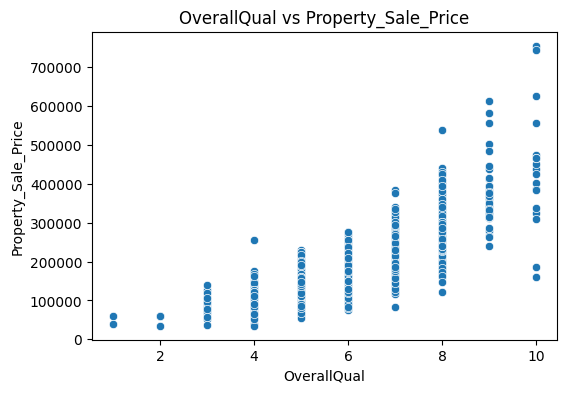

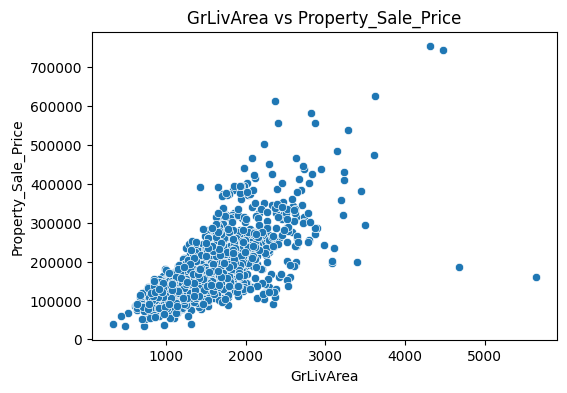

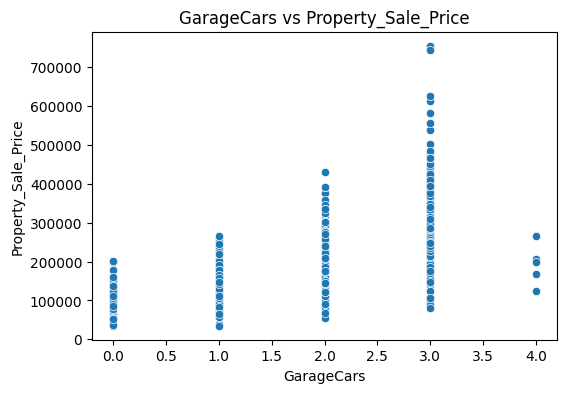

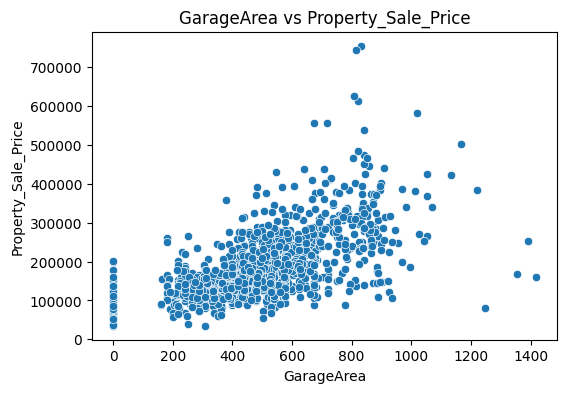

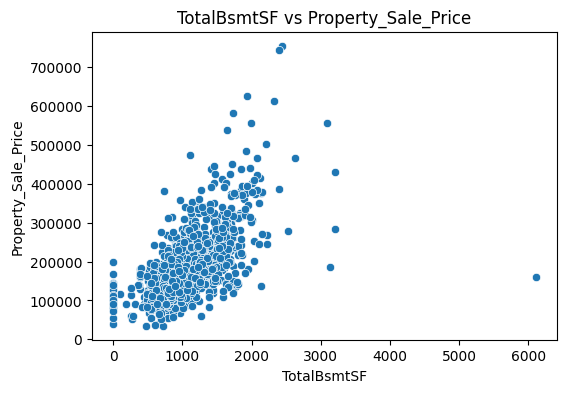

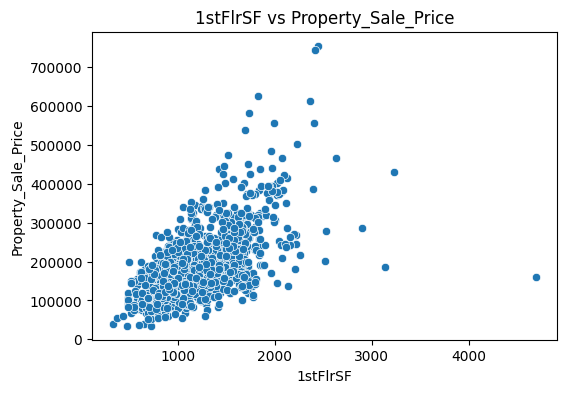

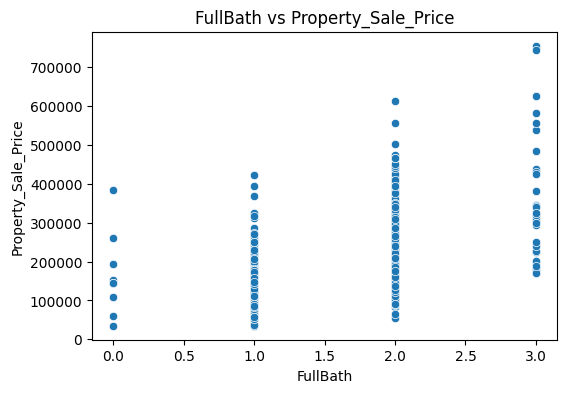

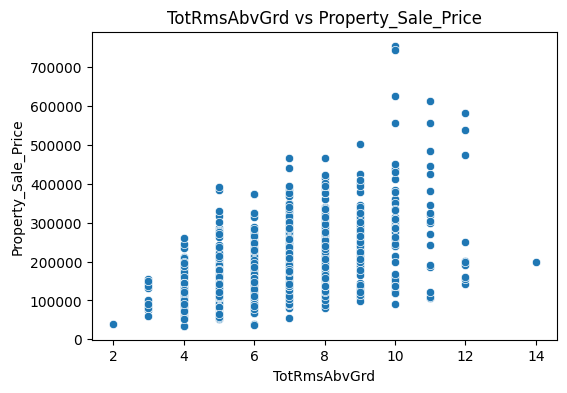

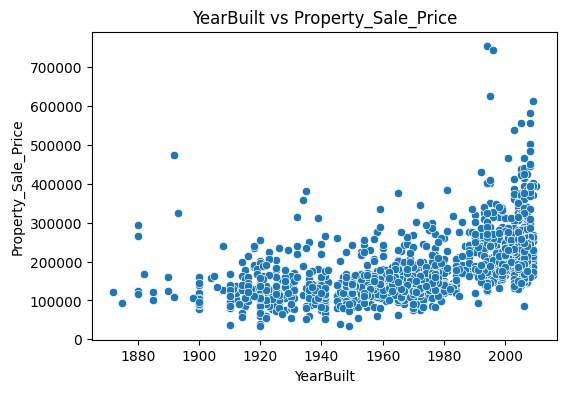

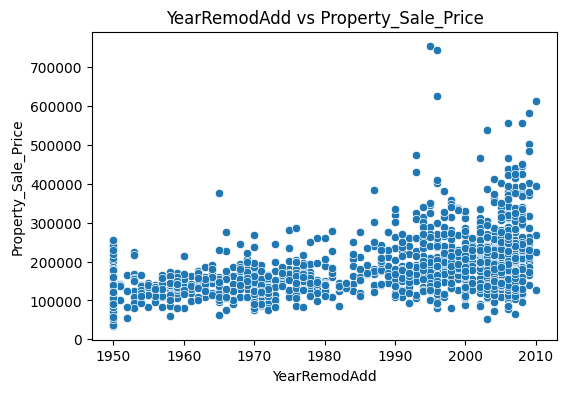

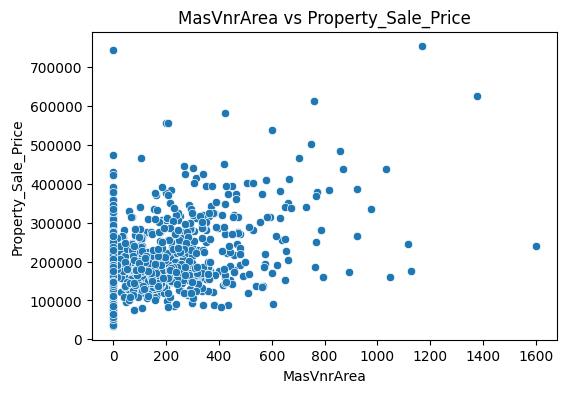

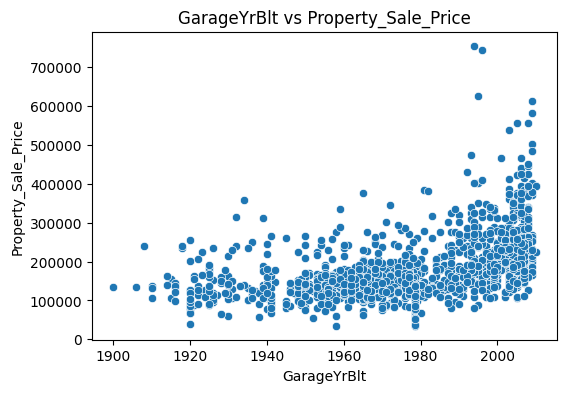

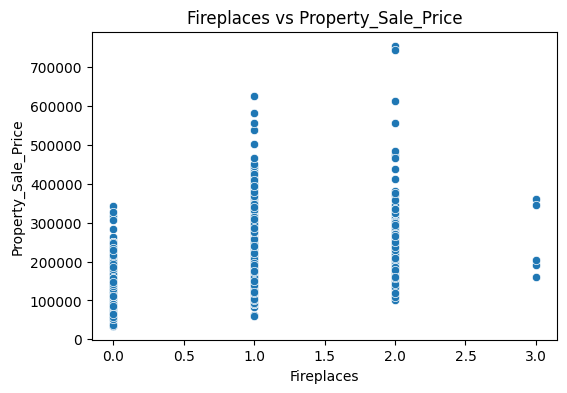

In [ ]:
#Quick visualization of top features vs price

import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plots of top features vs sale price
for feature in top_features.index:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=feature, y='Property_Sale_Price')
    plt.title(f'{feature} vs Property_Sale_Price')
    plt.show()

Keep only the top features for our model.

In [ ]:
selected_cols = list(top_features.index) + ['Property_Sale_Price']
df_model = df[selected_cols]

Check for multicollinearity

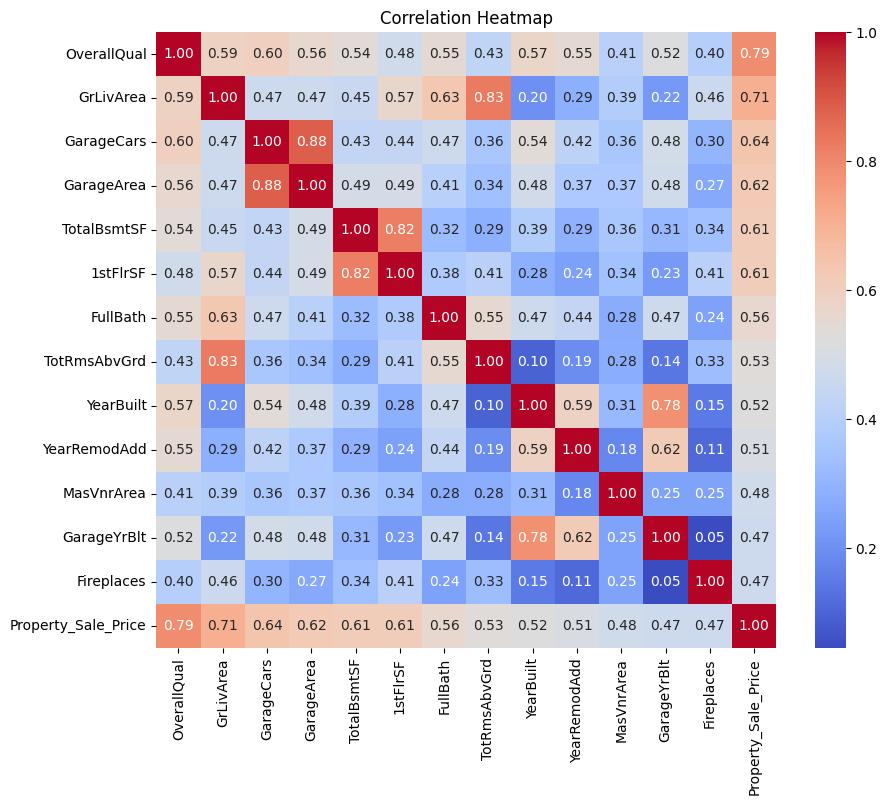

In [ ]:
#Some features might be highly correlated with each other (e.g., GarageArea and GarageCars). That could be redundant in linear models. Use a heatmap to spot this:

plt.figure(figsize=(10, 8))
sns.heatmap(df_model.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Building a basic model to predict Property_Sale_Price**
(Linear Regression model)

Linear Regression tries to find the best straight line that predicts a number (value) based on input features.

🔸 Real-life example:

You want to predict a house price based on its size (in square feet).

If you plot:

X-axis: House size

Y-axis: Price

Linear regression will try to draw a straight line that best fits the data points — so you can predict the price for any size.

In [ ]:
# What is the model learning?
# It learns the best values for the weights (w) and bias (b) so that the predictions are as close as possible to the real values — using something called a loss function.

In [ ]:
from sklearn.model_selection import train_test_split

# Select top features (already found from correlation)
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
                '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
                'MasVnrArea', 'GarageYrBlt', 'Fireplaces']

# Define X and y
X = df[top_features]
y = df['Property_Sale_Price']

# Split into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R²: {r2:.4f}")

Linear Regression MSE: 1476359696.94
Linear Regression R²: 0.8075


# **🔹 MSE (Mean Squared Error)**

🟡 It tells how wrong the predictions are, on average.
🟡 Our MSE is 1.47 billion, which sounds big — but that’s because house prices are big numbers.
🟢 Lower MSE = better model.

# **🔹 R² (R-squared Score)**

🟢 Tells how well the model explains the data.
🟢 0.8075 means the model explains 81% of the pattern in house prices.

# **Train a Random Forest for comparison**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.4f}")

Random Forest MSE: 890277844.36
Random Forest R²: 0.8839


In [ ]:
#Random Forest model makes more accurate predictions (lower MSE).
#It also understands more of the data (higher R²).
#So yes — Random Forest is performing better than Linear Regression here.

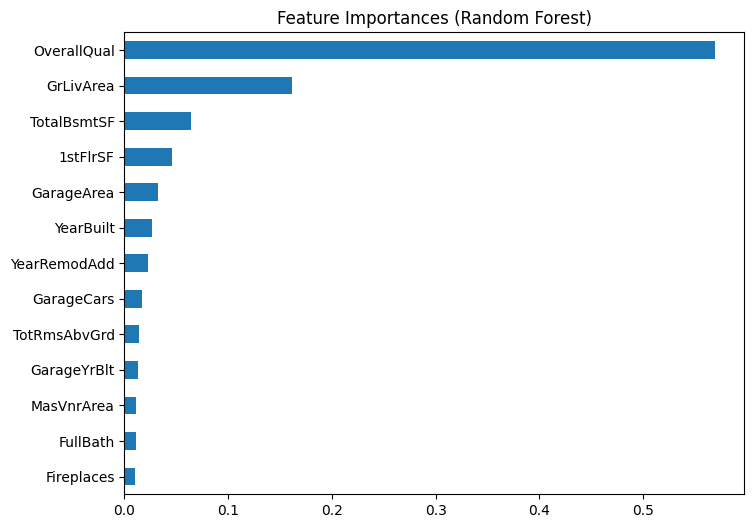

In [ ]:
#Feature importance (for Random Forest)
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=top_features)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances (Random Forest)")
plt.show()